In [165]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import csv
import pandas as pd
import scipy
import seaborn as sns

In [107]:
image=cv2.imread('C:\Data\Behaviour 2022\Clipboard.tif')
output=image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,
                           minDist=70,
                           dp=1,
                           param1=50,
                           param2=30,
                           minRadius=43,
                           maxRadius=46)
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

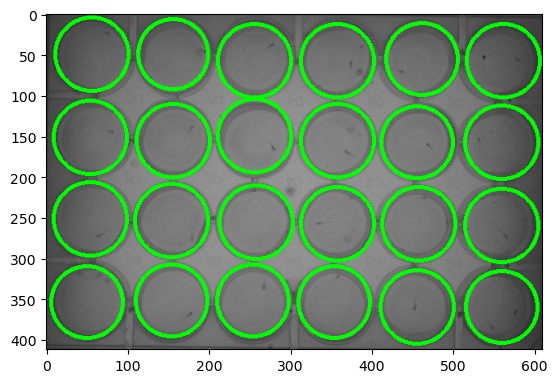

In [108]:
plt.imshow(output)

In [113]:
circles

array([[562,  58,  45],
       [456, 360,  45],
       [358, 258,  45],
       [560, 260,  45],
       [156, 156,  45],
       [ 56,  50,  45],
       [456, 158,  44],
       [358, 156,  45],
       [560, 158,  45],
       [354, 354,  44],
       [254, 352,  44],
       [154, 254,  45],
       [154, 352,  44],
       [256, 150,  45],
       [462,  56,  44],
       [458, 258,  45],
       [560, 360,  44],
       [ 50, 354,  44],
       [258, 256,  45],
       [256,  58,  45],
       [358,  58,  45],
       [ 54, 152,  45],
       [ 54, 252,  45],
       [156,  50,  43]])

In [65]:
data

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,ELLIPSE_Y0,ELLIPSE_MAJOR,ELLIPSE_MINOR,ELLIPSE_THETA,ELLIPSE_ASPECTRATIO,AREA,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX
0,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,Radius,...,Ellipse center y0,Ellipse long axis,Ellipse short axis,Ellipse angle,Ellipse aspect ratio,Area,Perimeter,Circularity,Solidity,Shape index
1,Label,Spot ID,Track ID,Quality,X,Y,Z,T,Frame,R,...,El. y0,El. long axis,El. sh. axis,El. angle,El. a.r.,Area,Perim.,Circ.,Solidity,Shape index
2,NaN,NaN,NaN,(quality),(pixel),(pixel),(pixel),(frame),NaN,(pixel),...,(pixel),(pixel),(pixel),(radians),NaN,(pixel^2),(pixel),NaN,NaN,NaN
3,ID2304,2304,0,15.0,275.6777777777778,40.18888888888889,0.0,0.0,0,2.1850968611841584,...,-0.012134932682386537,3.100471481743598,1.8447741310264842,2.578133804791693,1.680678100152244,15.0,18.18033988749895,0.5702917993605247,0.7894736842105263,4.6941435741782565
4,ID2369,2369,2,9.0,64.56666666666666,318.7,0.0,0.0,0,1.7841241161527712,...,0.18672222104385686,2.5025349750095796,1.7539546140851947,2.090458687803018,1.426795741983791,10.0,14.313755207963359,0.613341982518604,0.8333333333333334,4.526406832726132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418116,ID450417,450417,13.0,15.0,452.435484,77.037634,0.0,17986.0,17986,2.221217,...,0.182141,3.656902,1.646533,2.388471,2.220971,15.5,16.964037,0.676836,0.96875,4.30887
418117,ID450430,450430,1.0,32.0,257.197436,155.397436,0.0,17986.0,17986,3.216375,...,0.372726,6.338815,1.949176,1.759672,3.252049,32.5,29.342618,0.474346,0.855263,5.147036
418118,ID450463,450463,23.0,18.0,140.6,273.566667,0.0,17986.0,17986,2.523133,...,-0.006637,4.004404,1.873309,0.760632,2.13761,20.0,20.12899,0.620292,0.909091,4.500979
418119,ID450427,450427,296.0,24.0,333.642857,141.12585,0.0,17986.0,17986,2.792596,...,-0.141487,6.681379,1.557324,0.016494,4.290294,24.5,28.172293,0.387911,0.924528,5.691663


In [89]:
x_position=data[['POSITION_X','POSITION_Y']][3:]

In [128]:
positions=x_position.to_numpy(np.float16).astype(int)

In [178]:
positions.shape

(418118, 2)

In [123]:
positions

array(['275.6777777777778', '40.18888888888889'], dtype=object)

In [95]:
circle

array([358, 258,  45])

In [130]:
dist = scipy.spatial.distance_matrix(positions,circles[:,0:2],2)

In [132]:
dist.shape

(418118, 24)

In [133]:
dist

array([[287.56390594, 367.64248938, 233.26594265, ..., 247.75996448,
        306.24336728, 119.41942891],
       [561.78643629, 394.24357953, 300.059994  , ..., 166.30093205,
         66.75327707, 283.35137197],
       [368.16436547, 408.1825572 , 267.23959288, ..., 175.        ,
        248.24383175,  38.11823711],
       ...,
       [473.61271098, 327.75753233, 218.51544568, ..., 148.44864432,
         88.52683209, 223.57325421],
       [243.57750307, 251.17722827, 119.64113005, ..., 279.21676167,
        300.26987861, 199.02261178],
       [363.61655628, 218.24069281,  97.08243919, ..., 234.41203041,
        207.24140513, 236.5776828 ]])

In [241]:
wells=dist<circles[:,2]
well_id=np.argmax(wells,axis=1)
wells_dist=dist[wells]

MemoryError: Unable to allocate 1.27 TiB for an array with shape (418118, 418118) and data type float64

In [264]:
well_counts=np.zeros((2,24))
for well_nb in range(0,24):    
    temp=wells_dist[np.where(well_id[np.any(wells,axis=1)]==well_nb)]
    well_counts[0,well_nb]=np.count_nonzero(temp<=circles[well_nb,2]/2)
    well_counts[1,well_nb]=np.count_nonzero(temp>circles[well_nb,2]/2)

<BarContainer object of 24 artists>

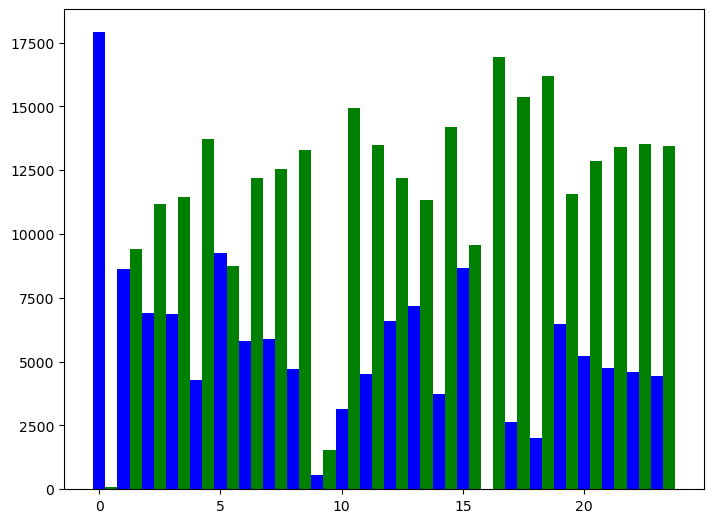

In [274]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(24)
ax.bar(X + 0.00, well_counts[0], color = 'b', width = 0.5)
ax.bar(X + 0.5, well_counts[1], color = 'g', width = 0.5)

In [275]:
well_proba=well_counts/np.sum(well_counts,axis=0)

<AxesSubplot:>

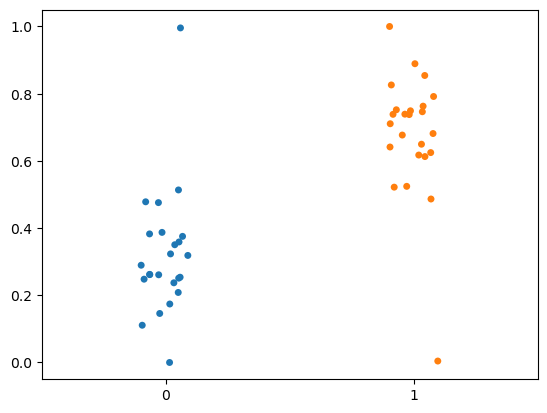

In [278]:
sns.stripplot(np.transpose(well_proba))

In [270]:
np.savetxt('C:\\Data\\22_11_01_4dpfGF.txt',well_counts,fmt='%f')

In [256]:
temp=wells_dist[np.where(well_id[np.any(wells,axis=1)]==well_nb)]

In [263]:
circles[well_nb,:]

array([562,  58,  45])

In [150]:
HistCount=np.zeros(gray.shape)
for (x,y) in positions:
    HistCount[y,x]=HistCount[y,x]+1

<function matplotlib.pyplot.show(close=None, block=None)>

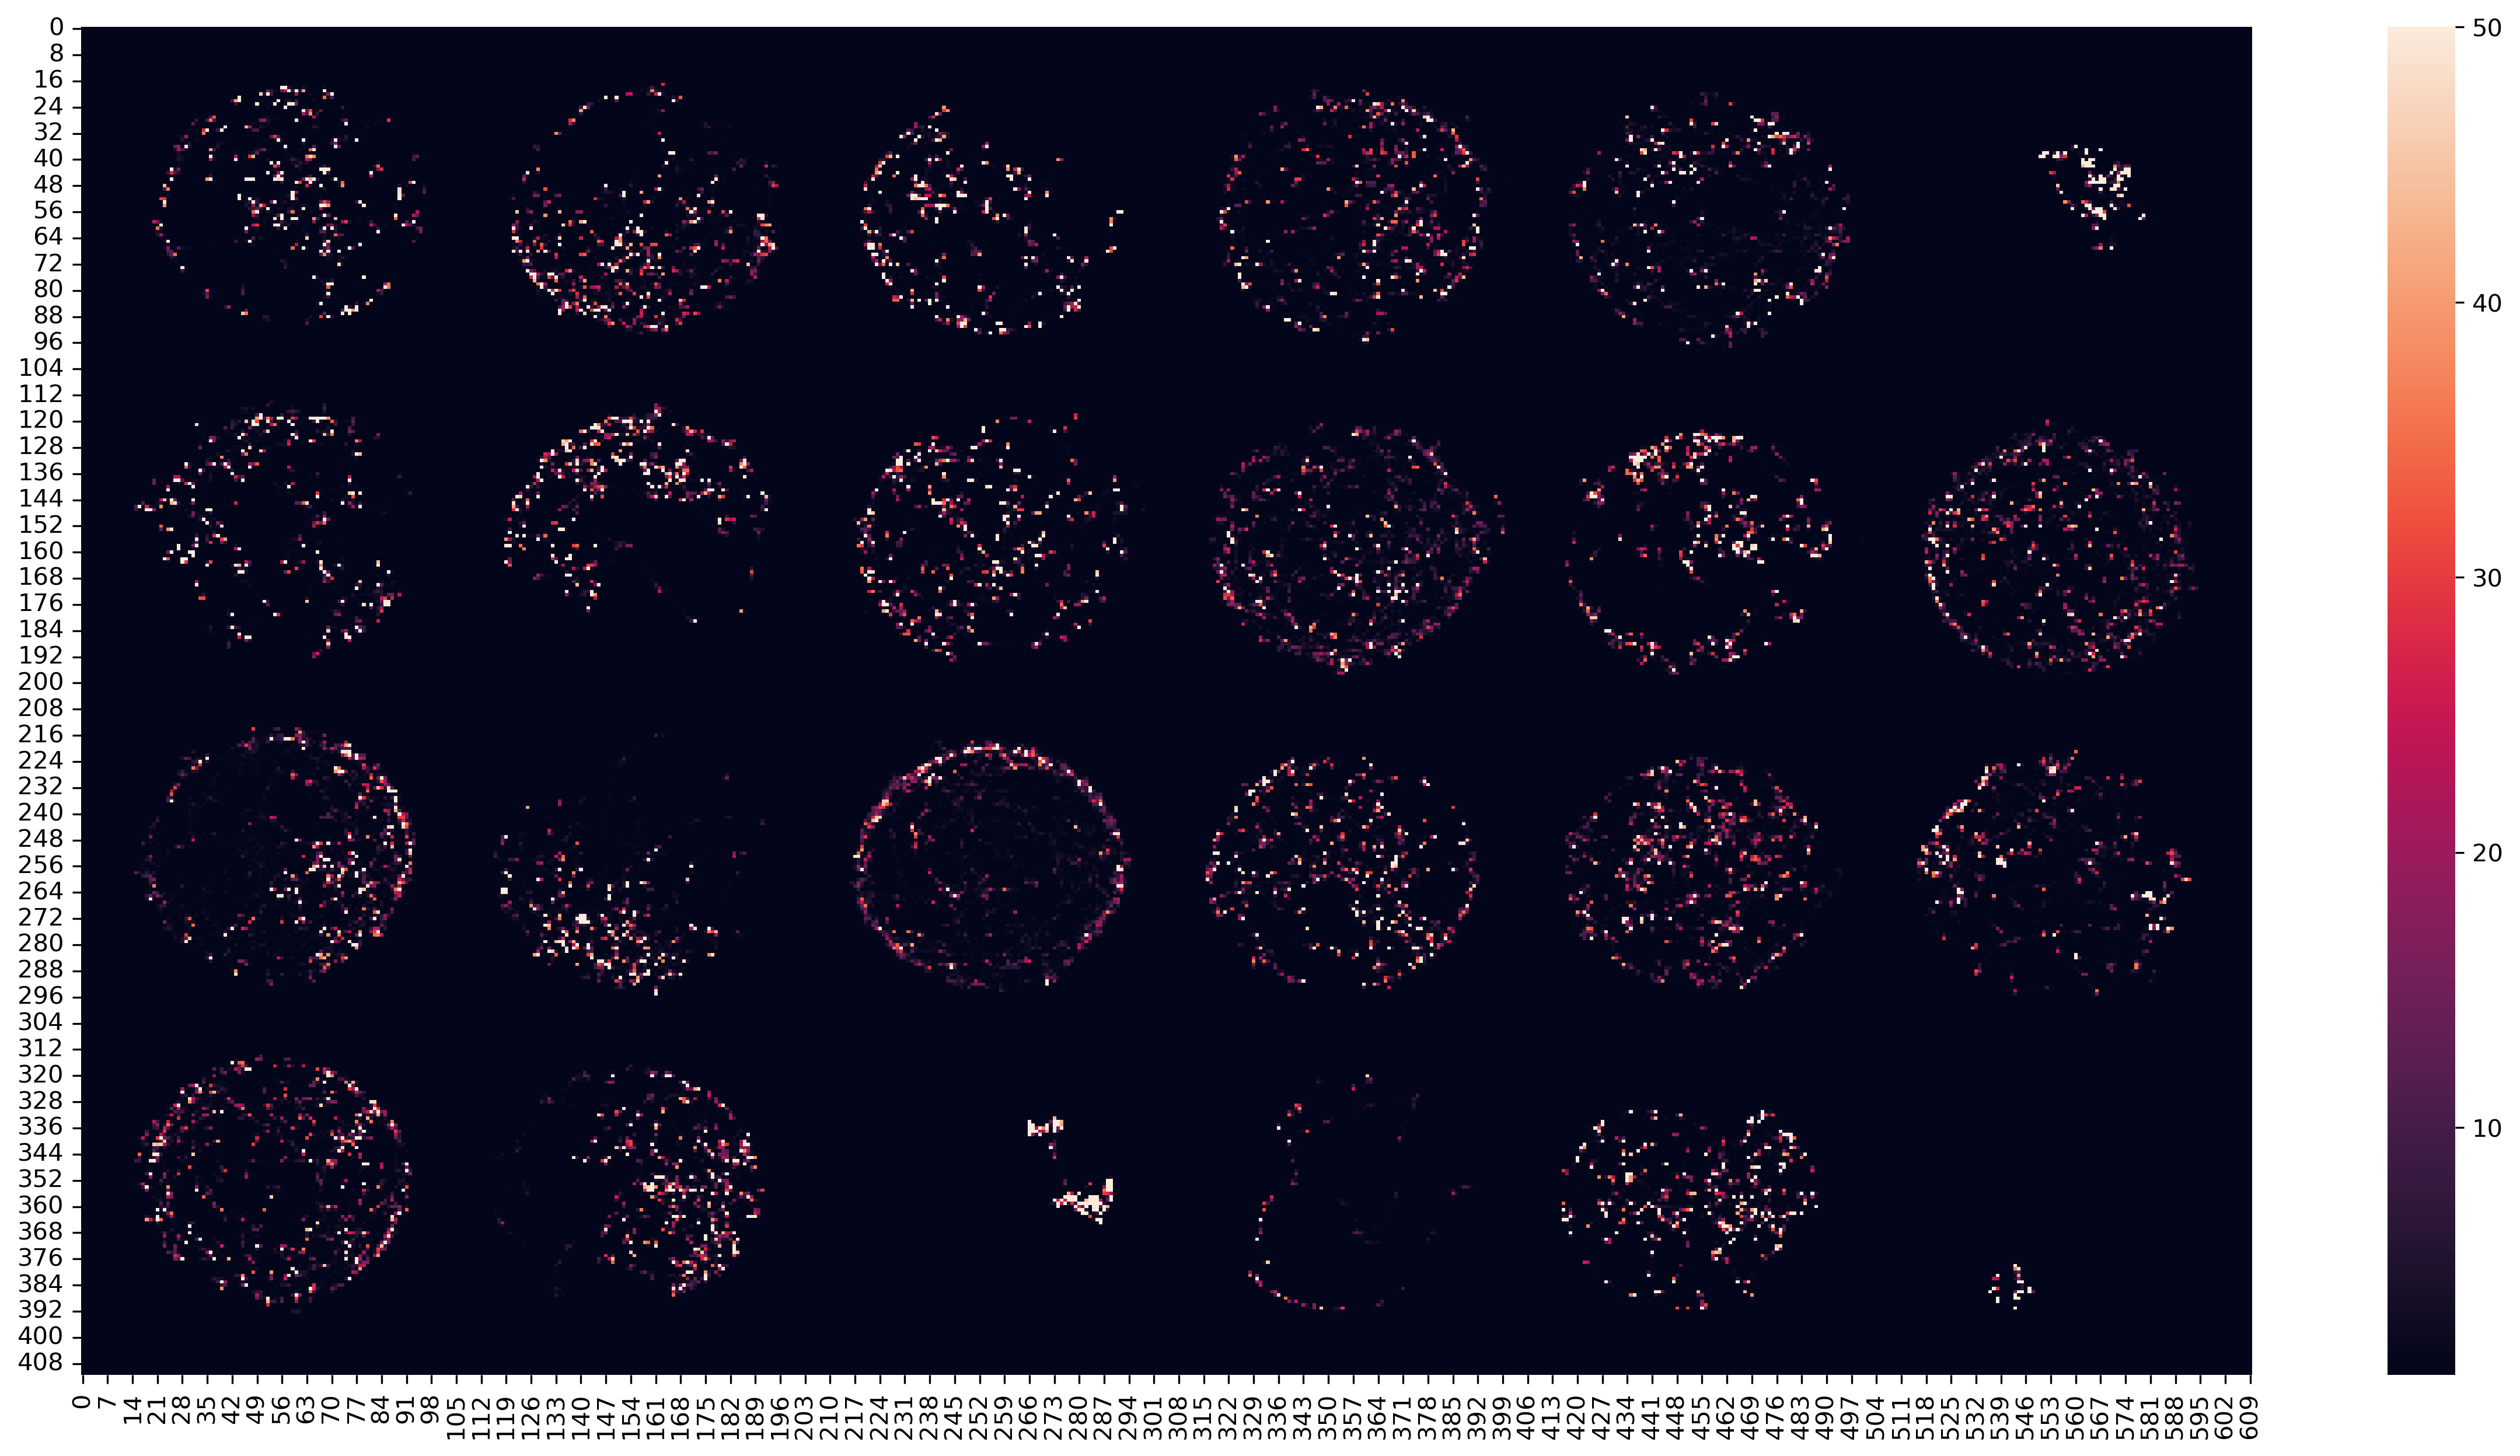

In [173]:
plt.figure(figsize=(20, 10), dpi=300)
sns.heatmap(HistCount,vmin=1,vmax=50)
plt.show

In [201]:
nx=int(np.ceil(gray.shape[0]/2))
ny=int(np.ceil(gray.shape[1]/2))
H, _, _ = np.histogram2d(positions[:,1],positions[:,0],bins=(nx,ny))

<function matplotlib.pyplot.show(close=None, block=None)>

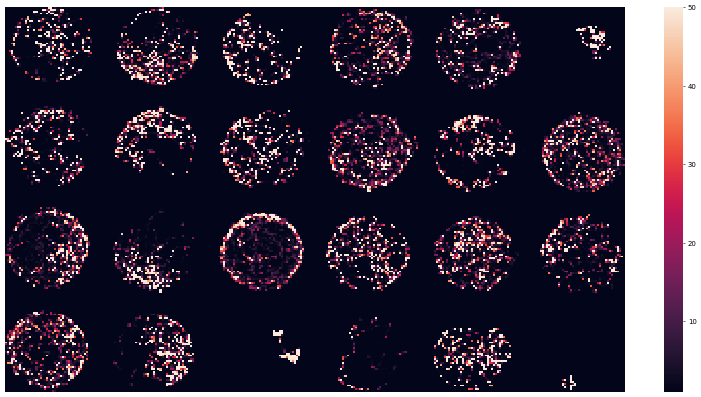

In [202]:
plt.figure(figsize=(20, 10), dpi=50)
sns.heatmap(H,vmin=1,vmax=50,xticklabels= False , yticklabels= False)
plt.show

In [203]:
import scipy.stats as st

In [205]:
x=positions[:,1]
y=positions[:,0]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)

-20.6 430.6 -42.9 651.9


In [216]:
nx=int(np.ceil(gray.shape[0]/2))
ny=int(np.ceil(gray.shape[1]/2))
xx, yy = np.mgrid[xmin:xmax:206j, ymin:ymax:305j]

In [219]:
positions_kde = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions_kde).T, xx.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

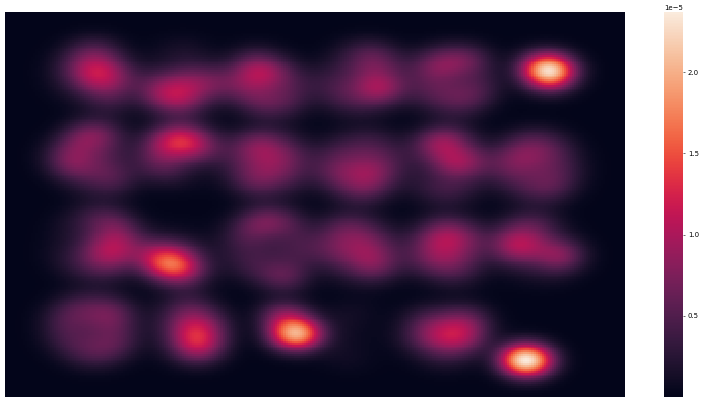

In [221]:
plt.figure(figsize=(20, 10), dpi=50)
sns.heatmap(f,xticklabels= False , yticklabels= False)
plt.show

In [283]:
x=positions[(positions[:,1]<100) & (positions[:,0]<100),1]
y=positions[(positions[:,1]<100) & (positions[:,0]<100),0]
# Define the borders
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)
xx, yy = np.mgrid[0:100:100j, 0:100:100j]
positions_kde = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions_kde).T, xx.shape)

17 90 20 96


In [300]:
x=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),1]
x.shape

(0,)

In [303]:
kde_img[xmin:xmax,ymin:ymax]=f

In [ ]:
kde_img=np.zeros((600,400))
for x_nb in range(0,6):
    for y_nb in range(0,4):
        xmin=(x_nb)*100
        xmax=(x_nb+1)*100
        ymin=(y_nb)*100
        ymax=(y_nb+1)*100
        x=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),0]
        y=positions[(positions[:,1]<=ymax) & (positions[:,0]<=xmax) & (positions[:,1]>=ymin) & (positions[:,0]>=xmin),1]
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions_kde = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = st.gaussian_kde(values)
        f = np.reshape(kernel(positions_kde).T, xx.shape)
        kde_img[xmin:xmax,ymin:ymax]=f/f.max()

In [ ]:
plt.figure(figsize=(11, 10), dpi=50)
sns.heatmap(kde_img,vmin=0,vmax=0.0002,xticklabels= False , yticklabels= False)
plt.show

In [226]:
x_position['POSITION_X']=pd.to_numeric(x_position['POSITION_X'])
x_position['POSITION_Y']=pd.to_numeric(x_position['POSITION_Y'])

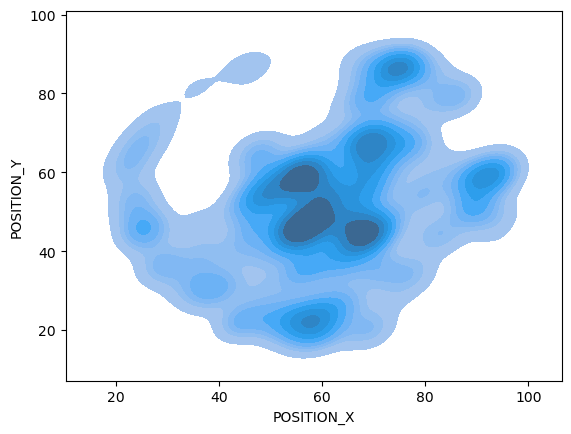

In [239]:
test=sns.kdeplot(x_position[(x_position['POSITION_X']<100) & (x_position['POSITION_Y']<100)],x='POSITION_X',y='POSITION_Y',fill=True)

In [240]:
test

<AxesSubplot:xlabel='POSITION_X', ylabel='POSITION_Y'>